# Fundamentos de analítica 2 (clase 3)

## Diego Fernando Agudelo 
## Universidad ICESI 
## diegoagudelo30@gmail.com

## **1. Carga de paquetes**

In [25]:
#!pip install pmdarima
from pmdarima.arima import auto_arima
from pmdarima.utils import acf,pacf
from pmdarima.arima import ARIMA
import pandas as pd
import numpy as np 
from statsmodels.sandbox.stats.runs import runstest_1samp # prueba de rachas de Wald y Wolfowitz
import statsmodels.api as sm # prueba de Box-Pierce y la modificación de Ljung-Box
from matplotlib import pyplot as plt # gráficos 
import pylab as py
from scipy import stats
from datetime import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

## **2. Carga de datos**



In [26]:
data = pd.read_excel(r'https://github.com/alfa7g7/Fundamentos-analitica-II/raw/main/Clase%201/Ejercicio%20en%20clase.-20240802/datosEmpleo.xlsx', index_col='mes', parse_dates=True)
data.head()

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120
2001-04-01,17.888575,6973.079,1519.137,4937.280
2001-05-01,17.945654,6994.462,1529.720,4928.911


(220, 4)


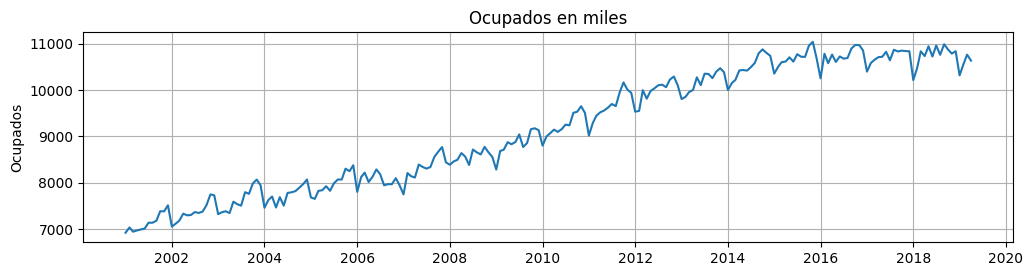

In [27]:
# imprimiendo el tamano del dataframe
print(data.shape)

# Graficando los datos
fig = plt.figure(figsize=(12, 6))

plt.subplot(2,1, 1)
plt.title("Ocupados en miles")
plt.ylabel("Ocupados")
plt.plot(data[["Ocupados"]])
plt.grid()
plt.show()

Protocolos de evaluación:

In [28]:
# Separar los datos en entrenamiento y prueba
horizon = 6 # El numero de pronósitco que queremos hacer hacia el futuro
train_len = len(data)- horizon
data_train = data.iloc[:train_len]
data_test = data.iloc[train_len:]

In [29]:
data_train

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120
2001-04-01,17.888575,6973.079,1519.137,4937.280
2001-05-01,17.945654,6994.462,1529.720,4928.911
...,...,...,...,...
2018-06-01,11.071347,10720.946,1334.725,6101.948
2018-07-01,10.125100,10959.197,1234.638,5984.340
2018-08-01,10.085244,10756.782,1206.529,6235.352


In [30]:
data_test

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2018-11-01,9.844539,10783.299,1177.484,6298.992
2018-12-01,10.725865,10835.398,1301.822,6142.856
2019-01-01,13.739328,10314.438,1642.851,6343.066
2019-02-01,12.427409,10557.917,1498.272,6264.403
2019-03-01,11.975098,10760.776,1463.919,6116.140
2019-04-01,11.144286,10632.028,1333.469,6395.575


## **3. ACF y PACF**

In [31]:
acf(data_train['Ocupados'],80) # es el numero de resagos

array([ 1.        ,  0.97791615,  0.96080801,  0.94667826,  0.93331952,
        0.92246288,  0.90890425,  0.89895712,  0.88616889,  0.87708222,
        0.87157593,  0.86626345,  0.86077083,  0.84142836,  0.82399124,
        0.8082148 ,  0.79697724,  0.78604389,  0.77291991,  0.76236066,
        0.74958796,  0.73837173,  0.73113649,  0.72434815,  0.7167177 ,
        0.69754163,  0.67796414,  0.66216212,  0.64826997,  0.63651197,
        0.62190178,  0.60943523,  0.59693407,  0.58423665,  0.57711519,
        0.57028981,  0.5606386 ,  0.53938066,  0.52087047,  0.50524286,
        0.49022537,  0.47732197,  0.46116269,  0.44869072,  0.4338035 ,
        0.42032113,  0.41028   ,  0.40035637,  0.38982644,  0.36876455,
        0.34815665,  0.331989  ,  0.31818874,  0.3052246 ,  0.28935639,
        0.27664314,  0.26282466,  0.25123173,  0.24267572,  0.23345379,
        0.22375204,  0.20333509,  0.18758961,  0.17295868,  0.15982591,
        0.14786426,  0.13436311,  0.12309555,  0.10875995,  0.09

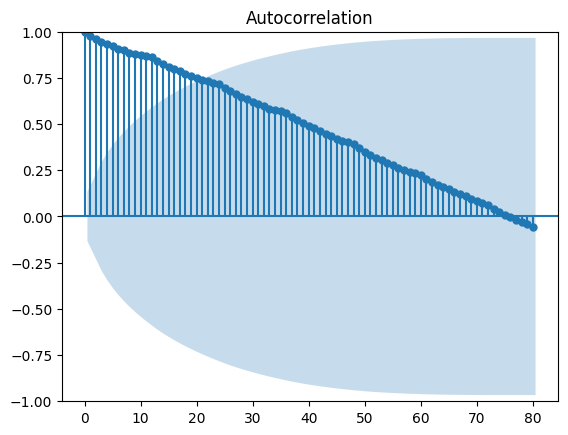

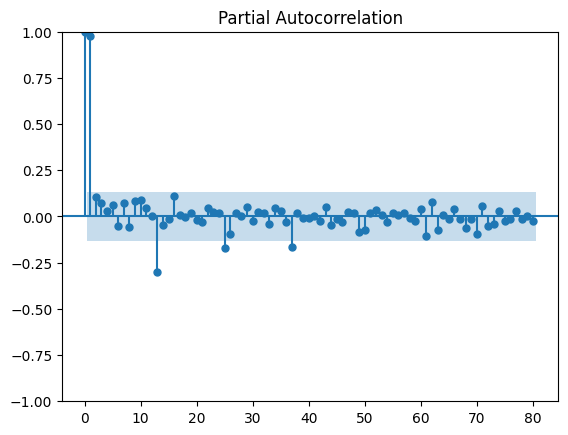

In [32]:
plot_acf(data_train['Ocupados'],lags=80);
plot_pacf(data_train['Ocupados'],lags=80);

<Figure size 1200x600 with 0 Axes>

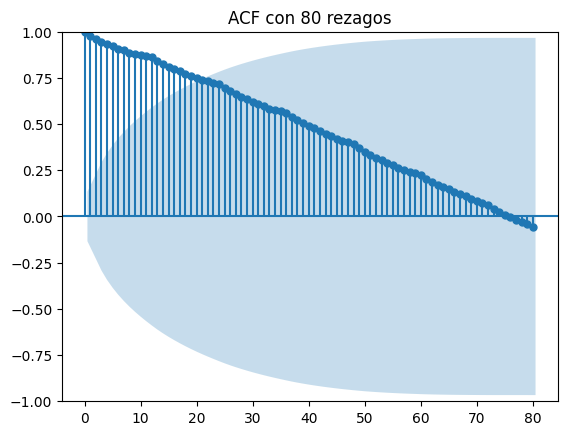

<Figure size 1200x600 with 0 Axes>

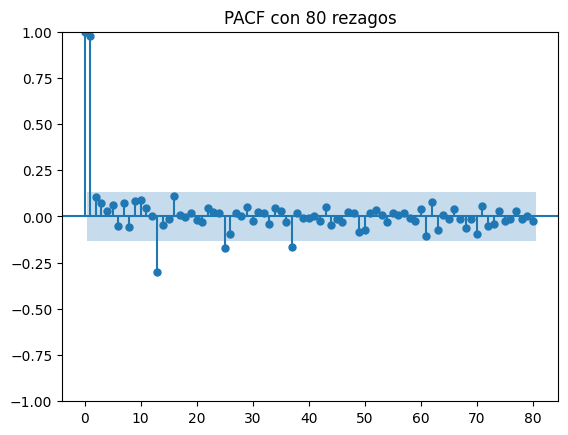

In [33]:
# Calcular y graficar ACF
plt.figure(figsize=(12, 6))
plot_acf(data_train['Ocupados'], lags=80)
plt.title('ACF con 80 rezagos')
plt.show()

# Calcular y graficar PACF
plt.figure(figsize=(12, 6))
plot_pacf(data_train['Ocupados'], lags=80)
plt.title('PACF con 80 rezagos')
plt.show()


ARIMA con "aic"

In [34]:
## information_criterion (‘aic’, ‘aicc’, ‘bic’, ‘hqic’, ‘oob’)
model = auto_arima(data_train["Ocupados"],max_p=10, max_q=10,information_criterion = ("aic"))
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1396.275
Date:                Sat, 17 Aug 2024   AIC                           2800.549
Time:                        12:13:29   BIC                           2813.994
Sample:                    01-01-2001   HQIC                          2805.983
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.3401      2.394      4.320      0.000       5.648      15.032
ar.L1          0.4455      0.096      4.657      0.000       0.258       0.633
ma.L1         -0.8728      0.048    -18.169      0.000      -0.967      -0.779
sigma2      2.871e+04   2475.423     11.598      0.000    2.39e+04    3.36e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                48.07
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                            -0.93
Prob(H) (two-sided):                  0.30   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
model.resid()

mes
2001-01-01    6904.955213
2001-02-01     157.874091
2001-03-01     -40.468263
2001-04-01      26.666541
2001-05-01      20.251385
                 ...     
2018-06-01    -197.962151
2018-07-01     153.306792
2018-08-01    -185.101577
2018-09-01     146.436429
2018-10-01     -94.770743
Length: 214, dtype: float64

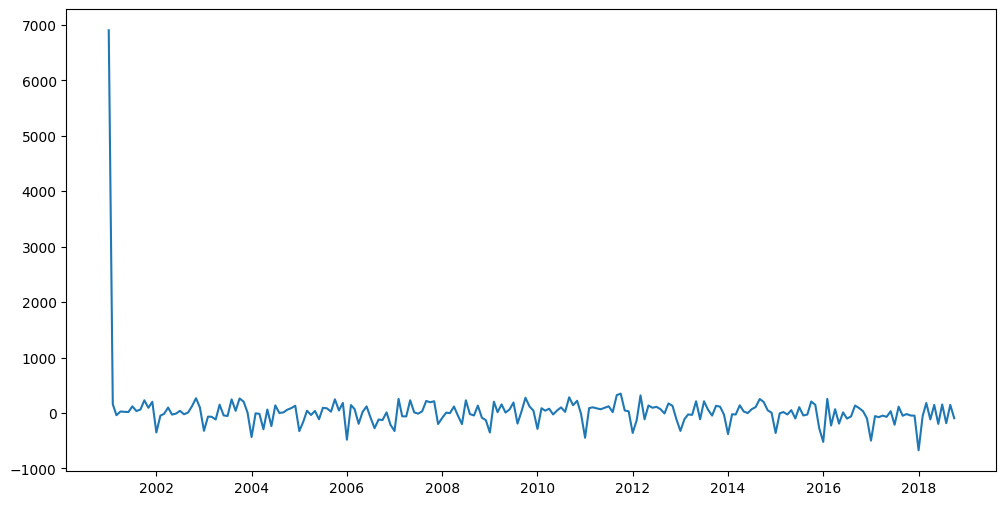

In [36]:
fig = plt.figure(figsize=(12, 6))
plt.plot(model.resid(),label="Residuales")

In [40]:
## information_criterion (‘aic’, ‘aicc’, ‘bic’, ‘hqic’, ‘oob’)
model = auto_arima(data_train["Ocupados"],max_p=10, max_q=10,information_criterion = ("aicc"))
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1396.275
Date:                Sat, 17 Aug 2024   AIC                           2800.549
Time:                        12:21:04   BIC                           2813.994
Sample:                    01-01-2001   HQIC                          2805.983
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.3401      2.394      4.320      0.000       5.648      15.032
ar.L1          0.4455      0.096      4.657      0.000       0.258       0.633
ma.L1         -0.8728      0.048    -18.169      0.000      -0.967      -0.779
sigma2      2.871e+04   2475.423     11.598      0.000    2.39e+04    3.36e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                48.07
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                            -0.93
Prob(H) (two-sided):                  0.30   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Buscando el mejor modelo ARIMA:

In [65]:
# Lista de criterios de información a probar
criterios = ['aic', 'aicc', 'bic', 'hqic', 'oob']

# Diccionario para almacenar los resultados
modelos = {}
resultados = []

for criterio in criterios:
    try:
        # Entrenar el modelo Auto ARIMA con el criterio actual
        model = auto_arima(data_train["Ocupados"], 
                           max_p=10, 
                           max_q=10, 
                           information_criterion=criterio) 
                           
        
        # Obtener el valor del criterio para el modelo entrenado
        if criterio == 'aic':
            valor_criterio = model.aic()
        elif criterio == 'bic':
            valor_criterio = model.bic()
        elif criterio == 'hqic':
            valor_criterio = model.hqic()
        elif criterio == 'aicc':
            n = len(data_train)
            k = model.get_params()['order'][0] + model.get_params()['order'][1] + model.get_params()['order'][2] + model.get_params()['seasonal_order'][0] + model.get_params()['seasonal_order'][1] + model.get_params()['seasonal_order'][2] # Sumar el número de parámetros
            #k = model.n_params()
            aic = model.aic()
            valor_criterio = aic + (2 * k * (k + 1)) / (n - k - 2)
        elif criterio == 'oob':
            # Notar que 'oob' no está disponible para modelos ARIMA en pmdarima, asignamos un valor alto
            valor_criterio = float('inf')
        else:
            valor_criterio = float('inf')  # Asignar un valor alto si el criterio no se puede calcular

        # Almacenar el modelo y su valor de criterio
        modelos[criterio] = {
            'modelo': model,
            'valor_criterio': valor_criterio
        }
        
        # Agregar resultados al DataFrame
        resultados.append({
            'Criterio': criterio.upper(),
            'Valor_Criterio': valor_criterio,
            'Resumen_Modelo': model.summary()
        })

        # Mostrar el resumen del modelo para cada criterio
        #print(f"Modelo con criterio {criterio.upper()}:")
        #print(model.summary())
        #print("\n" + "="*80 + "\n")
        
    except Exception as e:
        print(f"Error con el criterio {criterio.upper()}: {e}")

# Crear un DataFrame con todos los resultados de los modelos
resultados_df = pd.DataFrame(resultados)

# Mostrar el DataFrame con los resultados
print("\n Estos fueron los diferentes criterios de los modelos auto arima: \n")
print(resultados_df)

C:\Users\alfa7\AppData\Roaming\Python\Python312\site-packages\pmdarima\arima\_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '



 Estos fueron los diferentes criterios de los modelos auto arima: 

  Criterio  Valor_Criterio                                     Resumen_Modelo
0      AIC     2800.549087                                 SARIMAX Results...
1     AICC     2800.663920                                 SARIMAX Results...
2      BIC     2813.994256                                 SARIMAX Results...
3     HQIC     2805.982727                                 SARIMAX Results...
4      OOB             inf                                 SARIMAX Results...


In [66]:
# Encontrar el mejor modelo basado en el valor más bajo del criterio
mejor_criterio = min(modelos, key=lambda k: modelos[k]['valor_criterio'])
mejor_modelo = modelos[mejor_criterio]['modelo']

print(f"\nEl mejor modelo fue seleccionado usando el criterio {mejor_criterio.upper()}.")
print("\nResumen del mejor modelo:\n")
print(mejor_modelo.summary())


El mejor modelo fue seleccionado usando el criterio AIC.

Resumen del mejor modelo:

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1396.275
Date:              sáb., 17 ago. 2024   AIC                           2800.549
Time:                        12:51:54   BIC                           2813.994
Sample:                    01-01-2001   HQIC                          2805.983
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.3401      2.394      4.320      0.000       5.648      15.032
ar.L1          0.4455      0.096      4.657  

In [68]:
mejor_modelo.resid()

mes
2001-01-01    6904.955213
2001-02-01     157.874091
2001-03-01     -40.468263
2001-04-01      26.666541
2001-05-01      20.251385
                 ...     
2018-06-01    -197.962151
2018-07-01     153.306792
2018-08-01    -185.101577
2018-09-01     146.436429
2018-10-01     -94.770743
Length: 214, dtype: float64

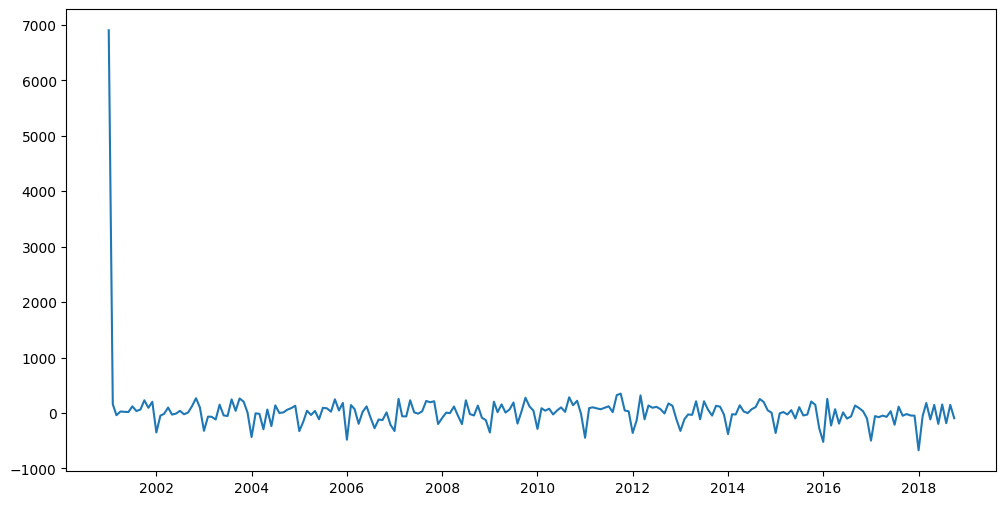

In [69]:
fig = plt.figure(figsize=(12, 6))
plt.plot(mejor_modelo.resid(),label="Residuales")

## **4. Pronóstico del ARIMA(1,1,1) obtenido en el auto.arima**


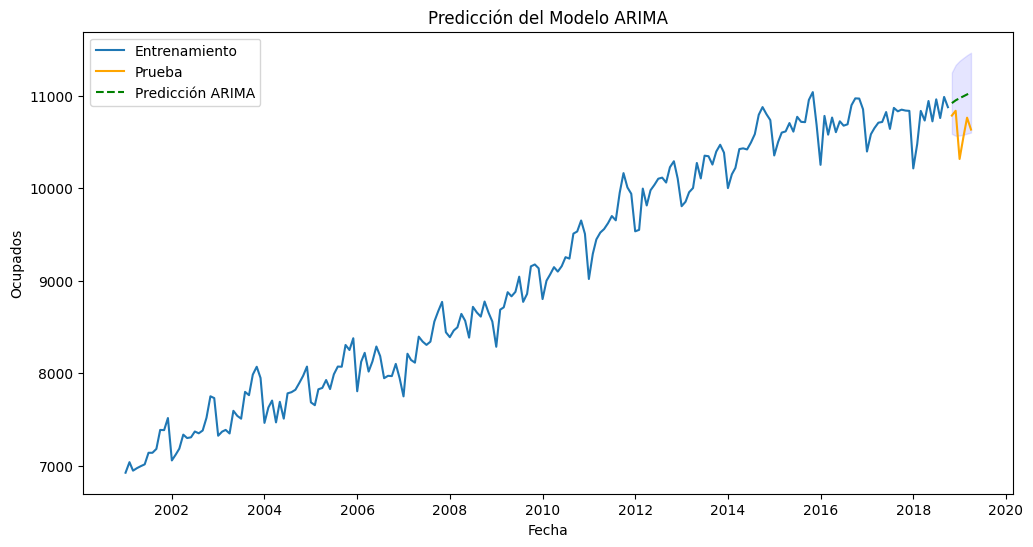

In [70]:
#h=10

#y_forec, conf_int  = model.predict(h,return_conf_int=True,alpha=0.05)
#preds = pd.DataFrame(np.column_stack([y_forec,conf_int[:,0] , conf_int[:,1]]))
#preds.columns = ['Point_forecast', 'lower_95', 'upper_95']

#x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)

#fig = plt.figure(figsize=(12, 6))
#plt.plot(data["time"],data["ARIMA011"],label="ARIMA011")
#plt.plot(x_for,preds['Point_forecast'],label="Forecast ARIMA011")
#plt.fill_between(x_for,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
#plt.legend()
#plt.show()



# Número de pasos a futuro para la predicción
h = 6  # Usamos 6 ya que es el tamaño de 'data_test'

# Realizar predicciones con el mejor modelo
y_forec, conf_int = mejor_modelo.predict(n_periods=h, return_conf_int=True, alpha=0.05)

# Crear un DataFrame con las predicciones y los intervalos de confianza
preds = pd.DataFrame(np.column_stack([y_forec, conf_int[:,0], conf_int[:,1]]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.index = data_test.index

# Crear un rango para el eje x de la predicción
x_for = np.arange(len(data_train), len(data_train) + h)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(data_train.index, data_train["Ocupados"], label="Entrenamiento")
plt.plot(data_test.index, data_test["Ocupados"], label="Prueba", color='orange')
plt.plot(preds.index, preds['Point_forecast'], label="Predicción ARIMA", color='green', linestyle='--')
plt.fill_between(preds.index, preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.title('Predicción del Modelo ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Ocupados')
plt.show()


## **5. Replicando el modelo sin hacer auto arima**

In [71]:
model = ARIMA(order=(1,1,1))
results = model.fit( data_train["Ocupados"])
results.summary()

C:\Users\alfa7\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alfa7\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1396.275
Date:              sáb., 17 ago. 2024   AIC                           2800.549
Time:                        13:26:15   BIC                           2813.994
Sample:                    01-01-2001   HQIC                          2805.983
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.3401      2.394      4.320      0.000       5.648      15.032
ar.L1          0.4455      0.096      4.657      0.000       0.258       0.633
ma.L1         -0.8728      0.048    -18.169      0.000      -0.967      -0.779
sigma2      2.871e+04   2475.423     11.598      0.000    2.39e+04    3.36e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                48.07
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                            -0.93
Prob(H) (two-sided):                  0.30   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **6. Intervalos de confianza usando boostrap**


In [74]:
# Número de pasos a futuro para la predicción
h= 6

# Obtener residuos del mejor modelo ajustado en `data_train`
res = results.resid()
#res = mejor_modelo.resid()

# Generar muestras de residuos
my_samples = []
for _ in range(1000):

    x = np.random.choice(res, size=h, replace=True)
    my_samples.append(x)

# Calcular cuantiles para los intervalos de confianza
q1=np.quantile(my_samples,0.025,axis=0)
q2=np.quantile(my_samples,0.975,axis=0) 

# Realizar predicciones con el mejor modelo
fore = results.predict(h,return_conf_int=False)
#fore = mejor_modelo.predict(n_periods=h, return_conf_int=False)

# Crear DataFrame con las predicciones y los intervalos de confianza
preds = pd.DataFrame(np.column_stack([fore,fore+np.cumsum(q1) , fore+np.cumsum(q2)]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.index = data_test.index  # Asegurarse de que el índice sea el del conjunto de datos de prueba
preds


,Point_forecast,lower_95,upper_95
mes,,,
2018-11-01,10918.120132,10536.603834,11192.967868
2018-12-01,10947.966699,10119.096027,11488.566199
2019-01-01,10971.604487,9695.379440,11787.051723
2019-02-01,10992.476047,9355.073485,12082.771020
2019-03-01,11012.115157,8940.357194,12368.389293
2019-04-01,11031.205167,8576.618262,12641.944628


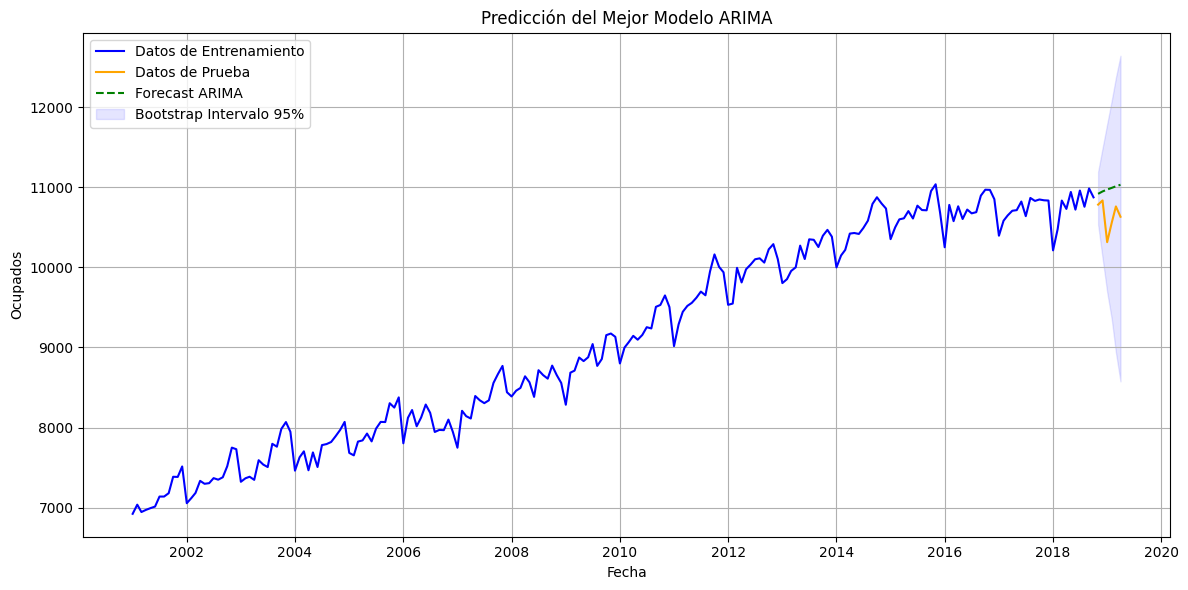

In [76]:
# Crear un rango para el eje x de la predicción
x_for = np.arange(len(data_train), len(data_train) + h)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(data_train.index, data_train["Ocupados"], label="Datos de Entrenamiento", color='blue')
plt.plot(data_test.index, data_test["Ocupados"], label="Datos de Prueba", color='orange')
plt.plot(preds.index, preds['Point_forecast'], label="Forecast ARIMA", color='green', linestyle='--')
plt.fill_between(preds.index, preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1, label="Bootstrap Intervalo 95%")
plt.legend(loc='upper left')  # Mover la leyenda a la parte superior izquierda
plt.title('Predicción del Mejor Modelo ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Ocupados')
plt.grid(True)
plt.tight_layout()  # Ajustar el diseño para evitar recortes
plt.show()

# **AQUI QUEDÉ QUE SIGUE?

### **7. Ejercicio en Clase**

Empleando la información del número de ocupados en miles de personas (Ocupados) para las 13 principales ciudades, encuentre el mejor pronóstico para los próximos 6 meses empleando los métodos vistos en la clase. Compare
los resultados con el mejor modelo encontrado en el ejercicio anterior. 

Escriba un breve informe de máximo una página de texto que explique cómo llega a sus proyeccciones y presente las proyecciones. Aclare en el texto cuáles serían las limitaciones de sus pronósticos.